In [8]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})

In [60]:
Ms = []
Zs = []
DFs = []
for logs_dir in sorted(list(os.walk('results'))[0][-1]):
    M = float(logs_dir.split('_')[0])
    Z = float(logs_dir.split('_')[1][:-4])
    DFs += [pd.read_table(os.path.join('results', logs_dir), skiprows=5, sep='\s+')]
    Ms += [M]
    Zs += [Z]
    print(logs_dir, M, Z)

0.8_0.0001.dat 0.8 0.0001
0.8_0.001.dat 0.8 0.001
0.8_0.01.dat 0.8 0.01
0.8_0.02.dat 0.8 0.02
1.2_0.0001.dat 1.2 0.0001
1.2_0.001.dat 1.2 0.001
1.2_0.01.dat 1.2 0.01
1.2_0.02.dat 1.2 0.02
1.5_0.0001.dat 1.5 0.0001
1.5_0.001.dat 1.5 0.001
1.5_0.01.dat 1.5 0.01
1.5_0.02.dat 1.5 0.02
1_0.0001.dat 1.0 0.0001
1_0.001.dat 1.0 0.001
1_0.01.dat 1.0 0.01
1_0.02.dat 1.0 0.02
2.0_0.0001.dat 2.0 0.0001
2.0_0.001.dat 2.0 0.001
2.0_0.01.dat 2.0 0.01
2.0_0.02.dat 2.0 0.02
2.5_0.0001.dat 2.5 0.0001
2.5_0.001.dat 2.5 0.001
2.5_0.01.dat 2.5 0.01
2.5_0.02.dat 2.5 0.02
3_0.0001.dat 3.0 0.0001
3_0.001.dat 3.0 0.001
3_0.01.dat 3.0 0.01
3_0.02.dat 3.0 0.02


In [57]:
DFs2 = []
for logs_dir in sorted(list(os.walk('results_full'))[0][-1]):
    DFs2 += [pd.read_table(os.path.join('results_full', logs_dir), skiprows=5, sep='\s+')]

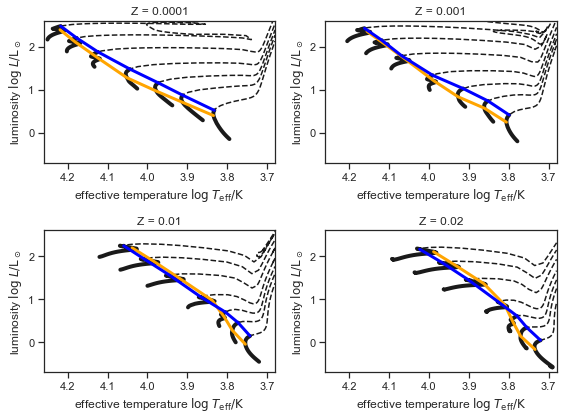

In [77]:
plt.figure(figsize=(8,6))

for ii, Z in enumerate(np.unique(Zs)):
    plt.subplot(2,2,ii+1)
    plt.title('Z = ' + str(Z))
    
    logLs0, logLs1, logLs2, logTs0, logTs1, logTs2 = [], [], [], [], [], []
    for DF, DF2, M, Z_ in zip(DFs, DFs2, Ms, Zs):
        if Z_ == Z:
            DF = DF[DF.center_h1 <= 0.7]
            DF2 = DF2[DF2.center_h1 <= 0.7]
            logLs0 += [DF.log_L.values[0]]
            logTs0 += [DF.log_Teff.values[0]]
            logLs1 += [DF.log_L.values[-1]]
            logTs1 += [DF.log_Teff.values[-1]]
            plt.plot(DF2['log_Teff'], DF2['log_L'], lw=1.5, c='k', ls='--')
            plt.plot(DF['log_Teff'], DF['log_L'], lw=4, c='k')
            
            DF2 = DF2[DF2.center_h1 >= 0.01]
            logLs2 += [DF2.log_L.values[-1]]
            logTs2 += [DF2.log_Teff.values[-1]]
    logLs0 = sorted(np.array(logLs0))
    logLs1 = sorted(np.array(logLs1))
    logLs2 = sorted(np.array(logLs2))
    logTs0 = sorted(np.array(logTs0))
    logTs1 = sorted(np.array(logTs1))
    logTs2 = sorted(np.array(logTs2))
    #plt.plot(logTs0, logLs0, 'k-', ls='--')
    plt.plot(logTs2, logLs2, 'k-', ls='-', lw=3, c='orange', zorder=99)
    plt.plot(logTs1, logLs1, 'k-', ls='-', lw=3, c='blue', zorder=99)
    
    #plt.text(4.1, 1, 'ZAMS')
    plt.xlim([3.68, 4.26])
    plt.ylim([-0.7, 2.6])
    
    plt.gca().invert_xaxis()
    plt.xlabel(r'effective temperature $\log\;T_{\rm{eff}}/\rm{K}$')
    plt.ylabel(r'luminosity $\log\;L/\rm{L}_\odot$')

plt.tight_layout()
plt.show()